<a href="https://colab.research.google.com/github/tau797/Knigi24/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Одним из интересных примеров практического применения машинного обучения является прогноз погодных условий (температуры воздуха, силы ветра, наличия осадков, и пр.), в конкретной местности со знанием географических координат и исторических данных о погоде.

Разберем применение такого базового метода машинного обучения, как линейная регрессия, на примере прогноза осадков в г. Остин (штат Техас).



Линейная регрессия подразумевает, что мы просто считаем, что имеет место линейная зависимость (для простейшего случая зависимости от одной переменной формула y=a*x+b), графически отражаемая прямой линией.

**Замечание**. Интересно происхождение термина. Почему "регрессия"? Это же синоним слова "деградация", "спад"? На самом деле, имела место примерно следующая история. В былые времена человечество не продуцировало данные настолько неимоверным потоком, как сейчас (по некоторым оценкам, в 2023 году было накоплено зетабайт информации). Ученые-статистики довольствовались не столь богатыми источниками данных. Однако, достаточно стабильным поставщиком здесь являлись военные. В частности, издавна измерялись основные параметры призывников, такие, как рост, вес, и пр.
Ученый ... изучал данные о росте призывников.
Как вам думается, у более рослых родителей и дети повыше ростом? Это - естественное предположение, и, несмотря на то, что процесс, конечно, имеет случайный характер, в среднем статистически это так. Но!
Обнаружилось, что сила отклонения от средних значений роста у детей обычно *меньше*, нежели у их отцов. Иными словами, имеет место снижение, или **регрессия**, отклонения.

Прогнозирование осадков - это применение науки и технологий для прогнозирования количества осадков в регионе. Важно точно определить количество осадков для эффективного использования водных ресурсов, урожайности сельскохозяйственных культур и предварительного планирования водных сооружений. В этой статье мы будем использовать линейную регрессию для прогнозирования количества осадков. Линейная регрессия показывает, сколько дюймов осадков мы можем ожидать. Набор данных представляет собой общедоступный набор данных о погоде в Остине, Техас, доступный на Kaggle ( https://www.kaggle.com/datasets/grubenm/austin-weather)

Для обучения модели нам нужно найти значения коэффициентов, которые минимизируют разницу между прогнозируемыми значениями и фактическими значениями в обучающем наборе. Это делается путем минимизации среднеквадратичной ошибки (MSE) с использованием градиентного спуска или какого-либо другого алгоритма оптимизации.
После того, как модель была обучена, ее можно использовать для прогнозирования количества осадков для новых входных значений.
Производительность модели можно оценить с использованием различных показателей, таких как коэффициент детерминации (R^2), среднеквадратичная ошибка (MSE) и среднеквадратичная ошибка (RMSE).

In [14]:
# используемые библиотеки
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# чтение изначальных данных
data = pd.read_csv('austin_weather.csv')
# убираем лишнее
data = data.iloc[:-200]

# первичное ознакомление с данными
data.info()
data.head(7).T

# смотрим число пропусков в данных
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1119 non-null   object
 1   TempHighF                   1119 non-null   int64 
 2   TempAvgF                    1119 non-null   int64 
 3   TempLowF                    1119 non-null   int64 
 4   DewPointHighF               1119 non-null   object
 5   DewPointAvgF                1119 non-null   object
 6   DewPointLowF                1119 non-null   object
 7   HumidityHighPercent         1119 non-null   object
 8   HumidityAvgPercent          1119 non-null   object
 9   HumidityLowPercent          1119 non-null   object
 10  SeaLevelPressureHighInches  1119 non-null   object
 11  SeaLevelPressureAvgInches   1119 non-null   object
 12  SeaLevelPressureLowInches   1119 non-null   object
 13  VisibilityHighMiles         1119 non-null   obje

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

Что здесь есть. Давайте разберемся. В таблице более 1100 строк. В столбцах информация:

 1   TempHighF - температура максимальная (в Фаренгейтах) \\
 2   TempAvgF  - температура средняя \\
 3   TempLowF  - температура минимальная \\
 4   DewPointHighF  - точка росы, температура максимальная \\
 5   DewPointAvgF   - точка росы, температура средняя \\
 6   DewPointLowF   - точка росы, температура минимальная \\
 7   HumidityHighPercent - влажность в процентах максимальная \\
 8   HumidityAvgPercent  - влажность в процентах средняя \\
 9   HumidityLowPercent  - влажность в процентах минимальная \\
 10  SeaLevelPressureHighInches  - давление на уровне моря максимальное \\
 11  SeaLevelPressureAvgInches   - давление на уровне моря среднее \\
 12  SeaLevelPressureLowInches   - давление на уровне моря минимальное \\
 13  VisibilityHighMiles         - видимость, на макс.дальность в милях \\
 14  VisibilityAvgMiles          - видимость в среднем \\
 15  VisibilityLowMiles          - видимость, на мин.дальность \\
 16  WindHighMPH                 - сила ветра, миль в час максимальная \\
 17  WindAvgMPH                  - сила ветра средняя \\
 18  WindGustMPH                 - сила порывов ветра \\
 19  PrecipitationSumInche       - уровень осадков в дюймах \\

Пусть нас не смущают все эти принятые в англосасконских странах странные единицы измерения - мили, дюймы, градусы Фаренгейта. Для целей машинного обучения это неважно.

Важно, что нас интересует (**целевая** переменная) столбец с уровнем осадков.
А все остальные параметры могут быть использованы для прогнозирования ("*зависимые* переменные")



In [15]:
# удаляем ненужные столбцы
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches','SeaLevelPressureLowInches'], axis=1)

# некоторые значения имеют букву «T», которая обозначает незначительное количество осадков.
# для использования в наших целях заменяем T на 0
data = data.replace('T', 0.0)

# некоторые параметры включают также '-' когда данные были недоступны
# их аналогично заменяем нулями
data = data.replace('-', 0.0)

# сохраняем данные в новый файл
data.to_csv('austin_final.csv')

# смотрим, что получилось
data.info()
data.head(7).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1119 non-null   int64 
 1   TempAvgF                   1119 non-null   int64 
 2   TempLowF                   1119 non-null   int64 
 3   DewPointHighF              1119 non-null   object
 4   DewPointAvgF               1119 non-null   object
 5   DewPointLowF               1119 non-null   object
 6   HumidityHighPercent        1119 non-null   object
 7   HumidityAvgPercent         1119 non-null   object
 8   HumidityLowPercent         1119 non-null   object
 9   SeaLevelPressureAvgInches  1119 non-null   object
 10  VisibilityHighMiles        1119 non-null   object
 11  VisibilityAvgMiles         1119 non-null   object
 12  VisibilityLowMiles         1119 non-null   object
 13  WindHighMPH                1119 non-null   object
 14  WindAvgM

,0,1,2,3,4,5,6
TempHighF,74,56,58,61,58,57,60
TempAvgF,60,48,45,46,50,48,53
TempLowF,45,39,32,31,41,39,45
DewPointHighF,67,43,31,36,44,39,41
DewPointAvgF,49,36,27,28,40,36,39
DewPointLowF,43,28,23,21,36,33,37
HumidityHighPercent,93,93,76,89,86,79,83
HumidityAvgPercent,75,68,52,56,71,63,65
HumidityLowPercent,57,43,27,22,56,47,47
SeaLevelPressureAvgInches,29.68,30.13,30.49,30.45,30.33,30.4,30.39


Предсказанный уровень осадков: [[1.70176265]]
Предсказанный уровень осадков (в миллиметрах): 43.2
График тенденции осадков: 


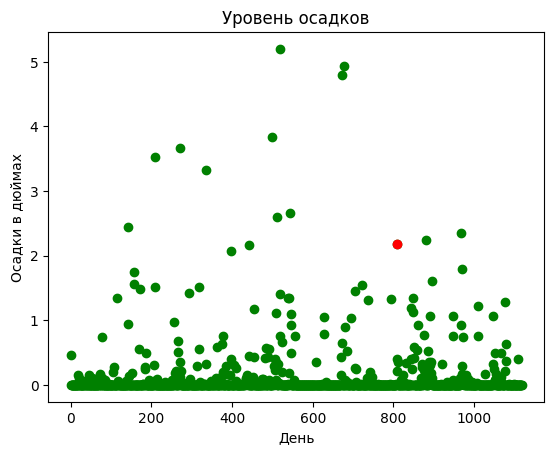

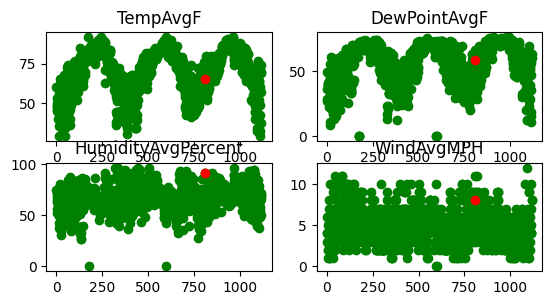

In [33]:
# используемые библиотеки
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# чтение очищенных данных
data = pd.read_csv("austin_final.csv")

# значения вектора X используются для обучения
# модели линейной регрессии - зависимые переменные,
# уровень осадков - целевое значение, мы его пока убираем
X = data.drop(['PrecipitationSumInches'], axis=1)

# И уровень осадков задаем как целевую переменную
Y = data['PrecipitationSumInches']

# преобразуем данные в вектор для целей алгоритма
Y = Y.values.reshape(-1, 1)

# инициализируем алгоритм линейной регрессии из библиотеки sklearn
clf = LinearRegression()

# обучаем модель
clf.fit(X, Y)

#подаем на вход обученной модели некоторые данные в виде
# числового вектора, для получения предсказания
# - значения всех параметров набора данных
input = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = input.reshape(1,-1)

# переводим в метрические единицы и печатаем прогноз
print('Предсказанный уровень осадков:', clf.predict(inp))
mm = float( clf.predict(inp))*25.4
print(f'Предсказанный уровень осадков (в миллиметрах): {mm:.1f}')

# выбираем случайно некоторый день из набора данных
day_index = 809
days = [i for i in range(Y.size)]

# построение графика зависимости уровней осадков от общего количества дней
# отслеживается один день, выделенный красным. Здесь выпадает ок. двух дюймов,
# это много - примерно пять сантиметров!
print("График тенденции осадков: ")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Уровень осадков")
plt.xlabel("День")
plt.ylabel("Осадки в дюймах")
plt.show()

x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH'], axis=1)

# построение графика с несколькими признаками (значениями x)
# и осадков или дождя, чтобы наблюдать тенденции
# print("График зависимости осадков от некоторых параметров: ")
plt.title("Зависимость осадков от выделенных параметров")
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
    plt.title(x_vis.columns.values[i])

plt.show()